In [1]:
#Analyses one assay assays based on distance to train set, then all assays

import numpy as np
import pandas as pd

#

In [2]:
#Only held out test set compounds

results=pd.read_csv("Predictions_train_heldout_scaled_prob_all_assays_ensemble_merger_heirarchial_test_compounds.csv")
results

,assay,StdInChI,fp_proba,fp_pred,fp_threshold,CP_proba,CP_pred,CP_threshold,true,ts,...,MFP_Correct,CP_Correct,fp_proba_scaled,CP_proba_scaled,simple_pred,Ensemble_Correct,merger_pred,merger_Correct,heirarchial_pred,heirarchial_Correct
0,1117304,InChI=1S/C27H36ClFO5/c1-14-9-16-17-11-19(29)18...,0.227629,0,0.342959,0.415502,1,0.366563,0.0,0.500000,...,True,False,0.331860,0.538630,0.0,True,0.0,True,0.0,True
1,1117304,InChI=1S/C15H12N2O3S/c1-20-11-6-8-12(9-7-11)21...,0.384489,1,0.342959,0.285488,0,0.366563,1.0,0.290323,...,True,False,0.531604,0.389412,0.0,False,1.0,True,1.0,True
2,1117304,InChI=1S/C9H6O3/c10-7-3-1-6-2-4-9(11)12-8(6)5-...,0.371232,1,0.342959,0.283642,0,0.366563,1.0,0.466667,...,True,False,0.521515,0.386894,0.0,False,1.0,True,1.0,True
3,1117304,InChI=1S/C12H17N5/c1-8-6-4-5-7-9(8)14-11-15-10...,0.298134,0,0.342959,0.283255,0,0.366563,0.0,0.300000,...,True,True,0.434650,0.386366,0.0,True,1.0,False,0.0,True
4,1117304,InChI=1S/C6H8ClN7O/c7-2-4(9)13-3(8)1(12-2)5(15...,0.242485,0,0.342959,0.362674,0,0.366563,0.0,0.285714,...,True,True,0.353519,0.494695,0.0,True,1.0,False,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,Novartis2,InChI=1S/C14H13Cl2NO3/c1-9-5-10(15)6-12(16)14(...,0.441790,1,0.258317,0.567265,1,0.520819,0.0,0.378378,...,False,False,0.623687,0.548465,1.0,False,1.0,False,0.0,True
10124,Novartis2,InChI=1S/C19H18O8/c1-8-5-13(26-4)11(7-20)17(22...,0.382330,1,0.258317,0.587759,1,0.520819,0.0,0.379310,...,False,False,0.583603,0.569849,1.0,False,1.0,False,0.0,True
10125,Novartis2,InChI=1S/C12H13N3O2/c1-17-12(16)10-7-4-2-3-5-9...,0.274487,1,0.258317,0.518695,0,0.520819,0.0,0.270270,...,False,True,0.510901,0.497961,1.0,False,1.0,False,0.0,True
10126,Novartis2,InChI=1S/C16H14N2OS/c1-18-9-8-17-16(18)20-11-1...,0.261270,1,0.258317,0.407709,0,0.520819,0.0,0.352941,...,False,True,0.501991,0.391412,0.0,True,1.0,False,0.0,True


In [71]:
metrics_list = pd.read_csv("Analyse_Assays/All_metrics_withassaydesc.csv")
metrics_list[metrics_list.PubChemAID.isin(["2685", "651635", "504327"])]

,chembl_id,PubChemAID,assay_organism,BioAssay Type,Target,Readout type,method,f1,precision,Sensitivity,Specificity,ba,mcc,AUC
68,CHEMBL2114784,651635,Homo sapiens,confirmatory,Protein Target,fluorescence,CP,0.468750,0.441176,0.500000,0.536585,0.518293,0.036176,0.493496
69,CHEMBL2114784,651635,Homo sapiens,confirmatory,Protein Target,fluorescence,MFP,0.512821,0.416667,0.666667,0.317073,0.491870,-0.017163,0.522764
70,CHEMBL2114784,651635,Homo sapiens,confirmatory,Protein Target,fluorescence,Ensemble Averaged,0.492754,0.435897,0.566667,0.463415,0.515041,0.029864,0.515041
71,CHEMBL2114784,651635,Homo sapiens,confirmatory,Protein Target,fluorescence,Distance Based Merger,0.468750,0.441176,0.500000,0.536585,0.518293,0.036176,0.491057
200,CHEMBL1614459,2685,Drosophila,confirmatory,Protein Target,Fluorescence,CP,0.153846,0.111111,0.250000,0.304348,0.277174,-0.395182,0.293478
201,CHEMBL1614459,2685,Drosophila,confirmatory,Protein Target,Fluorescence,MFP,0.230769,0.166667,0.375000,0.347826,0.361413,-0.245784,0.288043
202,CHEMBL1614459,2685,Drosophila,confirmatory,Protein Target,Fluorescence,Ensemble Averaged,0.083333,0.062500,0.125000,0.347826,0.236413,-0.461591,0.236413
203,CHEMBL1614459,2685,Drosophila,confirmatory,Protein Target,Fluorescence,Distance Based Merger,0.526316,0.454545,0.625000,0.739130,0.682065,0.333008,0.739130
216,CHEMBL1738606,504327,Homo sapiens,confirmatory,Protein Target,Fluorescence,CP,0.222222,0.285714,0.181818,0.750000,0.465909,-0.078023,0.600000
217,CHEMBL1738606,504327,Homo sapiens,confirmatory,Protein Target,Fluorescence,MFP,0.550000,0.379310,1.000000,0.100000,0.550000,0.194759,0.590909


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df

,assay,StdInChI,fp_proba,fp_pred,fp_threshold,CP_proba,CP_pred,CP_threshold,true,ts,...,MFP_Correct,CP_Correct,fp_proba_scaled,CP_proba_scaled,simple_pred,Ensemble_Correct,merger_pred,merger_Correct,heirarchial_pred,heirarchial_Correct
0,2685,InChI=1S/C29H33N3O6S2/c1-21-5-10-26(11-6-21)39...,0.109020,0,0.226649,0.195814,0,0.258914,0.0,0.795455,...,True,True,0.240505,0.378145,0.0,True,0.0,True,0.0,True
1,2685,InChI=1S/C31H47N3O7S/c1-22-19-34(23(2)21-35)31...,0.240105,1,0.226649,0.441855,1,0.258914,0.0,0.800000,...,False,False,0.508700,0.623428,1.0,False,1.0,False,1.0,False
2,2685,"InChI=1S/C36H40N4O4S/c1-36(2,3)45(44)40-23-29-...",0.245186,1,0.226649,0.236183,0,0.258914,0.0,0.600000,...,False,True,0.511985,0.456103,0.0,True,1.0,False,1.0,False
3,2685,InChI=1S/C28H29FN2O7S/c1-36-19-6-4-7-21(12-19)...,0.328760,1,0.226649,0.207978,0,0.258914,0.0,0.522727,...,False,True,0.566019,0.401636,0.0,True,0.0,True,1.0,False
4,2685,InChI=1S/C17H18N2O3/c1-12-6-8-13(9-7-12)17(21)...,0.402716,1,0.226649,0.308141,1,0.258914,0.0,0.313725,...,False,False,0.613834,0.533213,1.0,False,0.0,True,1.0,False
5,2685,InChI=1S/C28H29FN2O6S/c1-17(18-5-3-2-4-6-18)30...,0.207381,0,0.226649,0.368803,1,0.258914,0.0,0.642857,...,True,False,0.457493,0.574140,1.0,False,0.0,True,1.0,False
6,2685,InChI=1S/C16H14N4O2/c1-11-5-7-12(8-6-11)15-10-...,0.220612,0,0.226649,0.264501,1,0.258914,1.0,0.175439,...,False,True,0.486683,0.503769,0.0,False,0.0,False,1.0,True
7,2685,InChI=1S/C29H32FN3O3/c1-3-14-32-26-23(24(17-34...,0.243754,1,0.226649,0.381872,1,0.258914,0.0,0.416667,...,False,False,0.511059,0.582958,1.0,False,0.0,True,1.0,False
8,2685,InChI=1S/C33H31FN2O7S/c34-22-8-13-27(14-9-22)4...,0.264684,1,0.226649,0.305060,1,0.258914,0.0,0.634146,...,False,False,0.524591,0.531134,1.0,False,0.0,True,1.0,False
9,2685,InChI=1S/C31H33N3O6/c1-38-23-9-6-21(7-10-23)32...,0.369464,1,0.226649,0.295315,1,0.258914,0.0,0.490196,...,False,False,0.592335,0.524559,1.0,False,0.0,True,1.0,False


<AxesSubplot:xlabel='pc', ylabel='ts'>

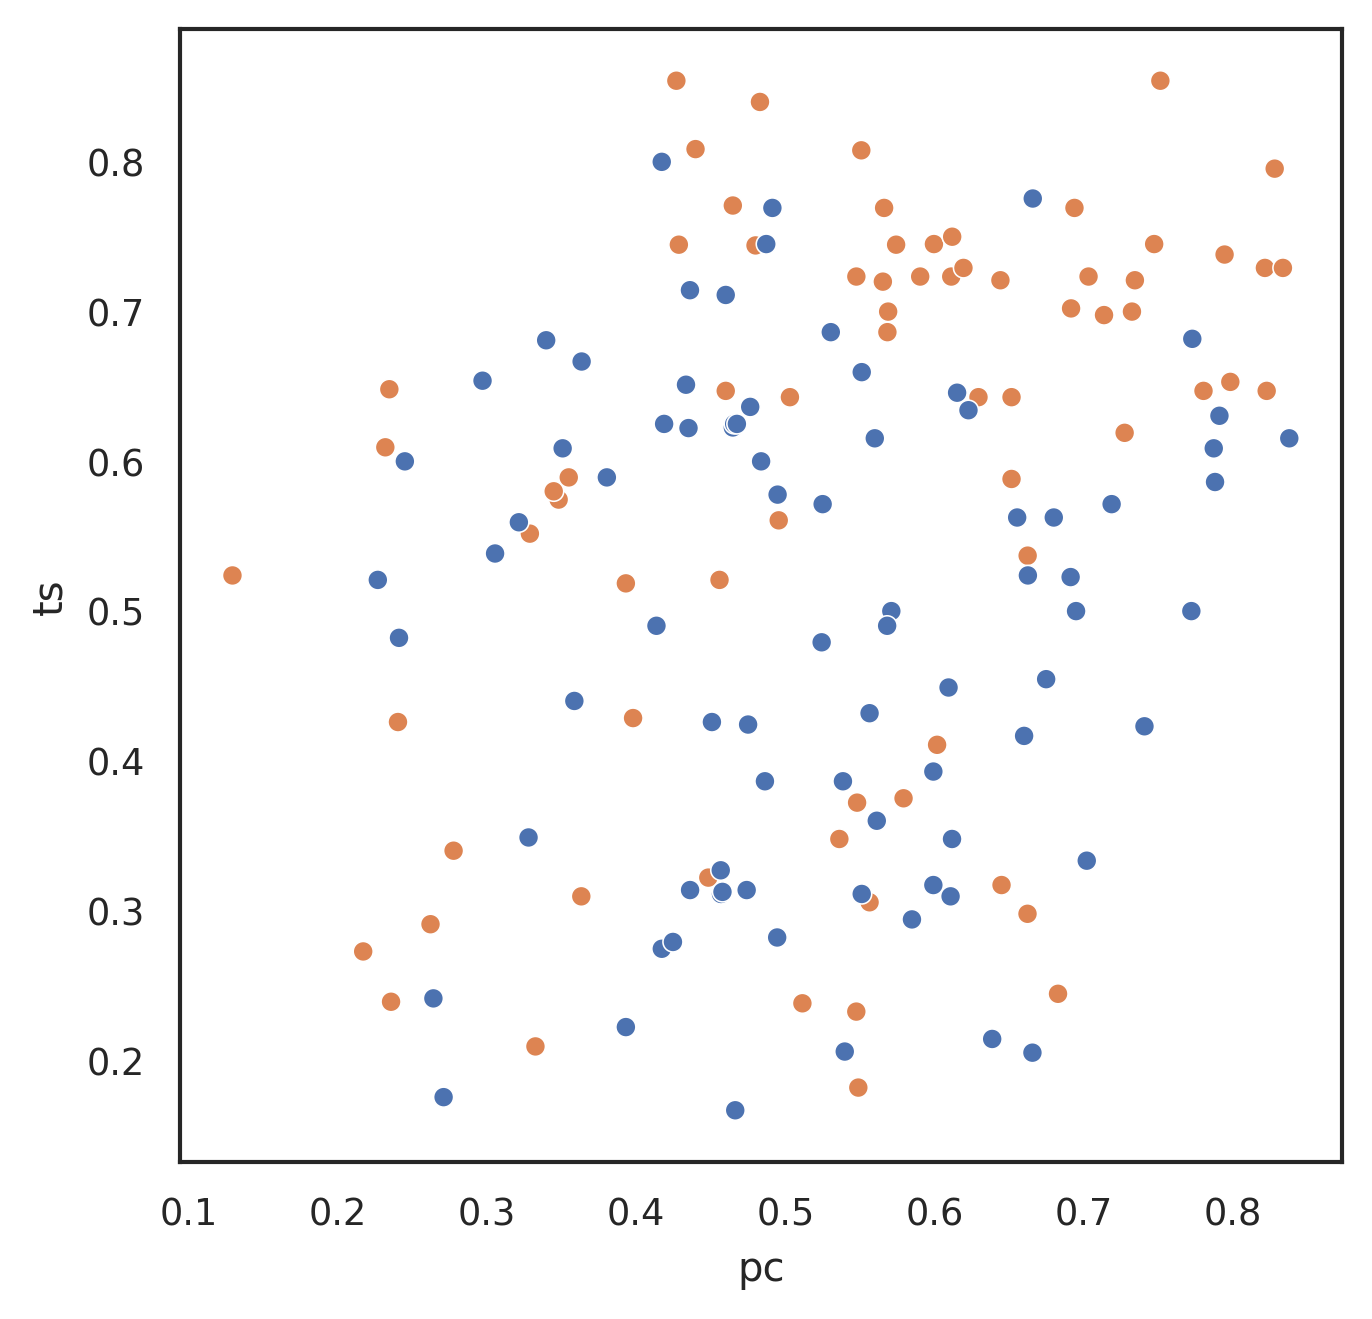

In [129]:
k=pd.read_csv("Predictions_train_heldout_scaled_prob_all_assays.csv")
k=k[k["assay"]=="2685"].reset_index(drop=True)
sns.scatterplot(data=k, x="pc", y="ts", hue="MFP_Correct", legend=False)

2685
MFP_Correct


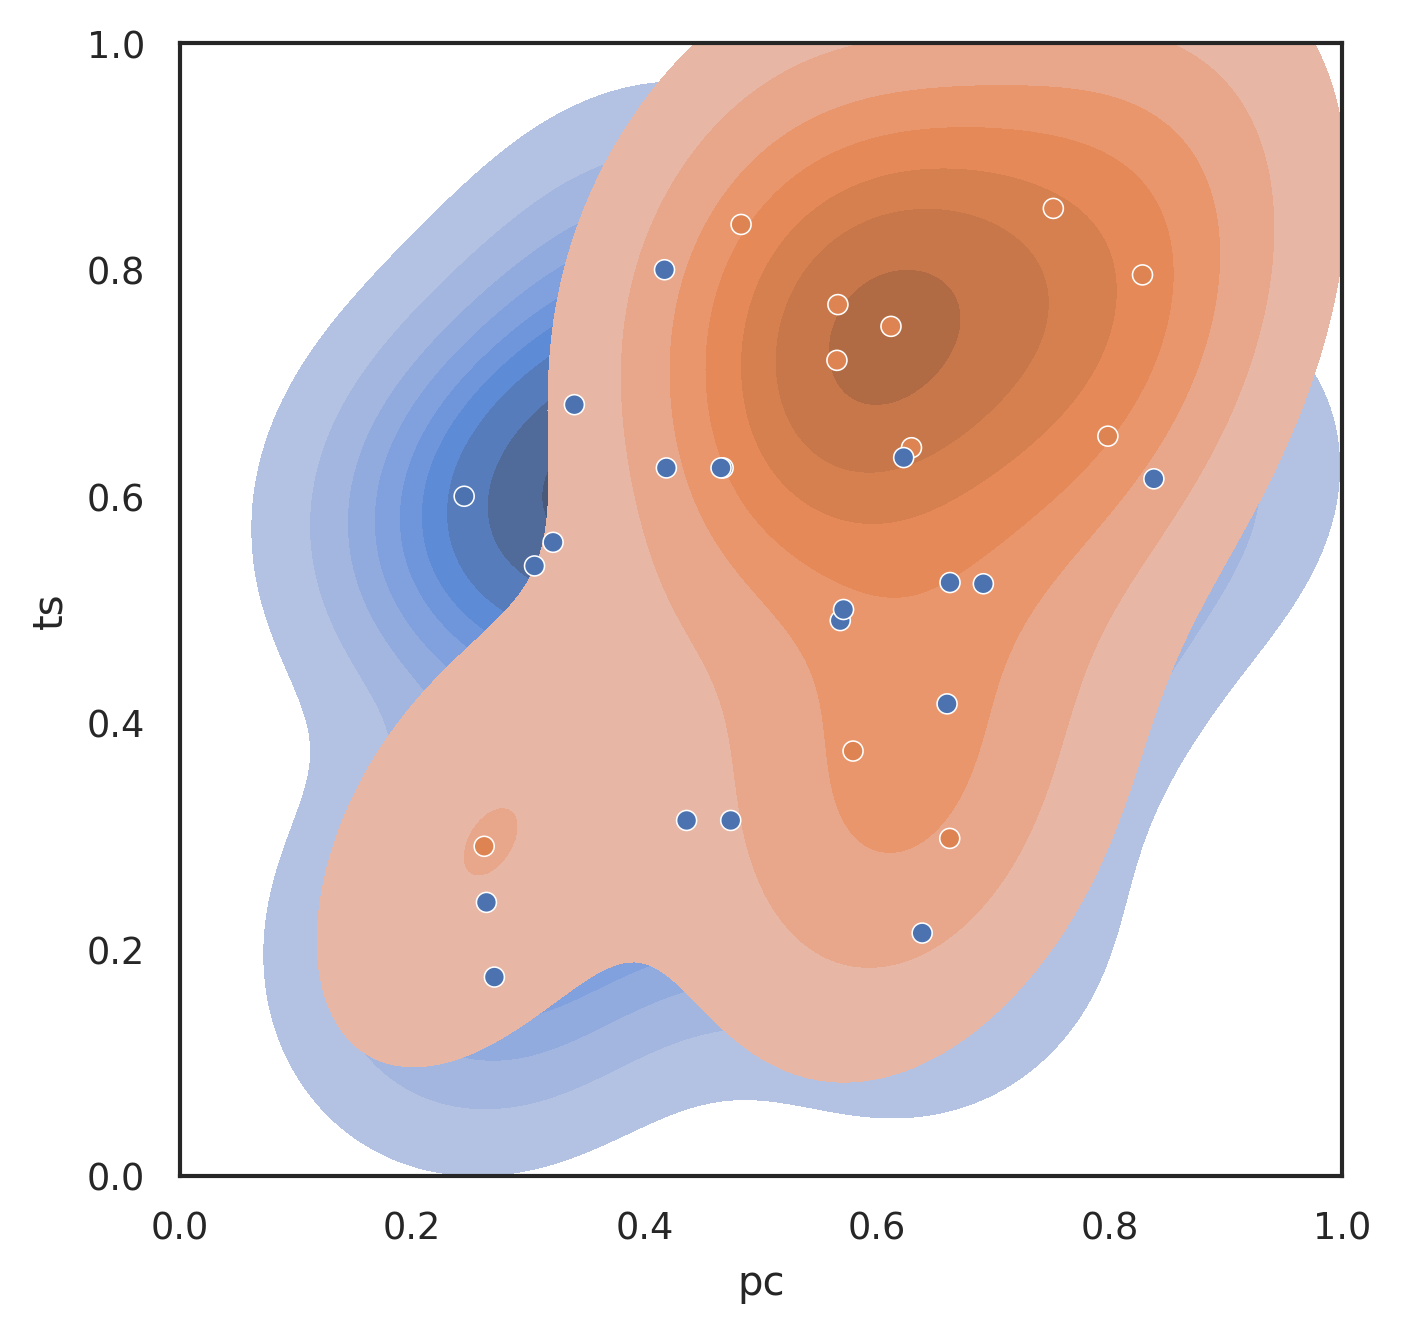

CP_Correct


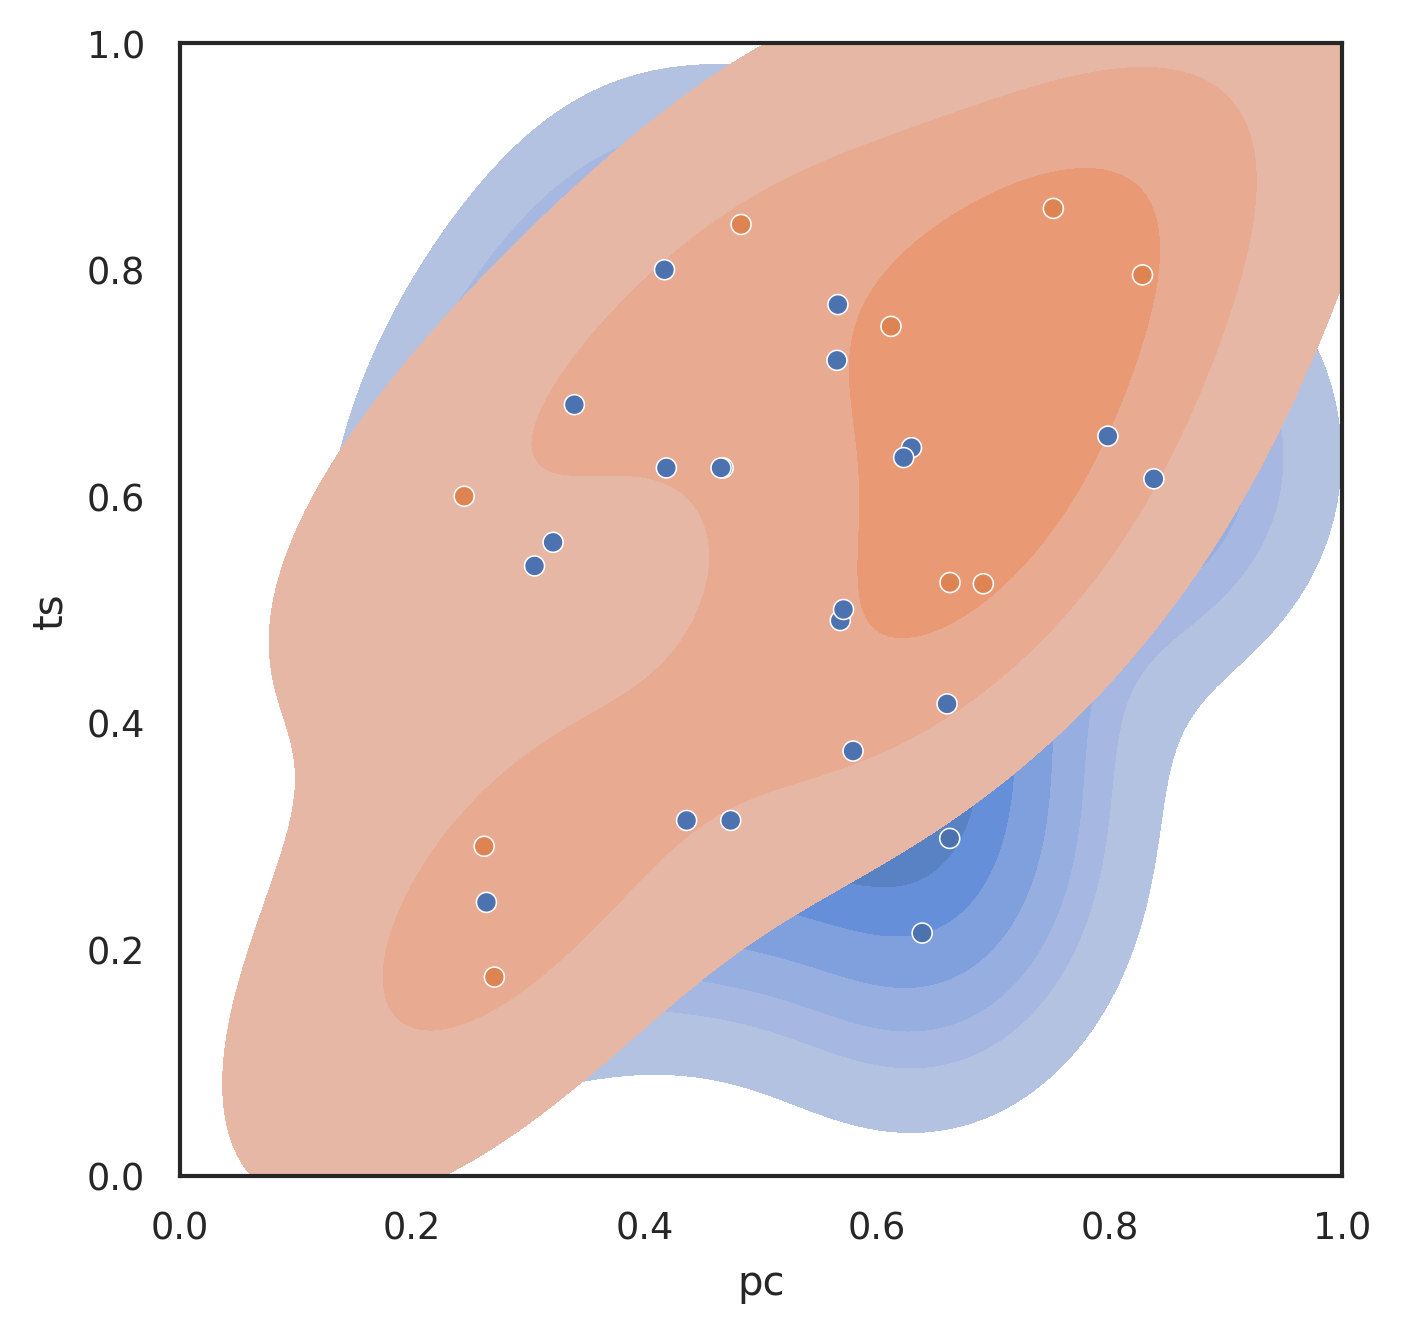

Ensemble_Correct


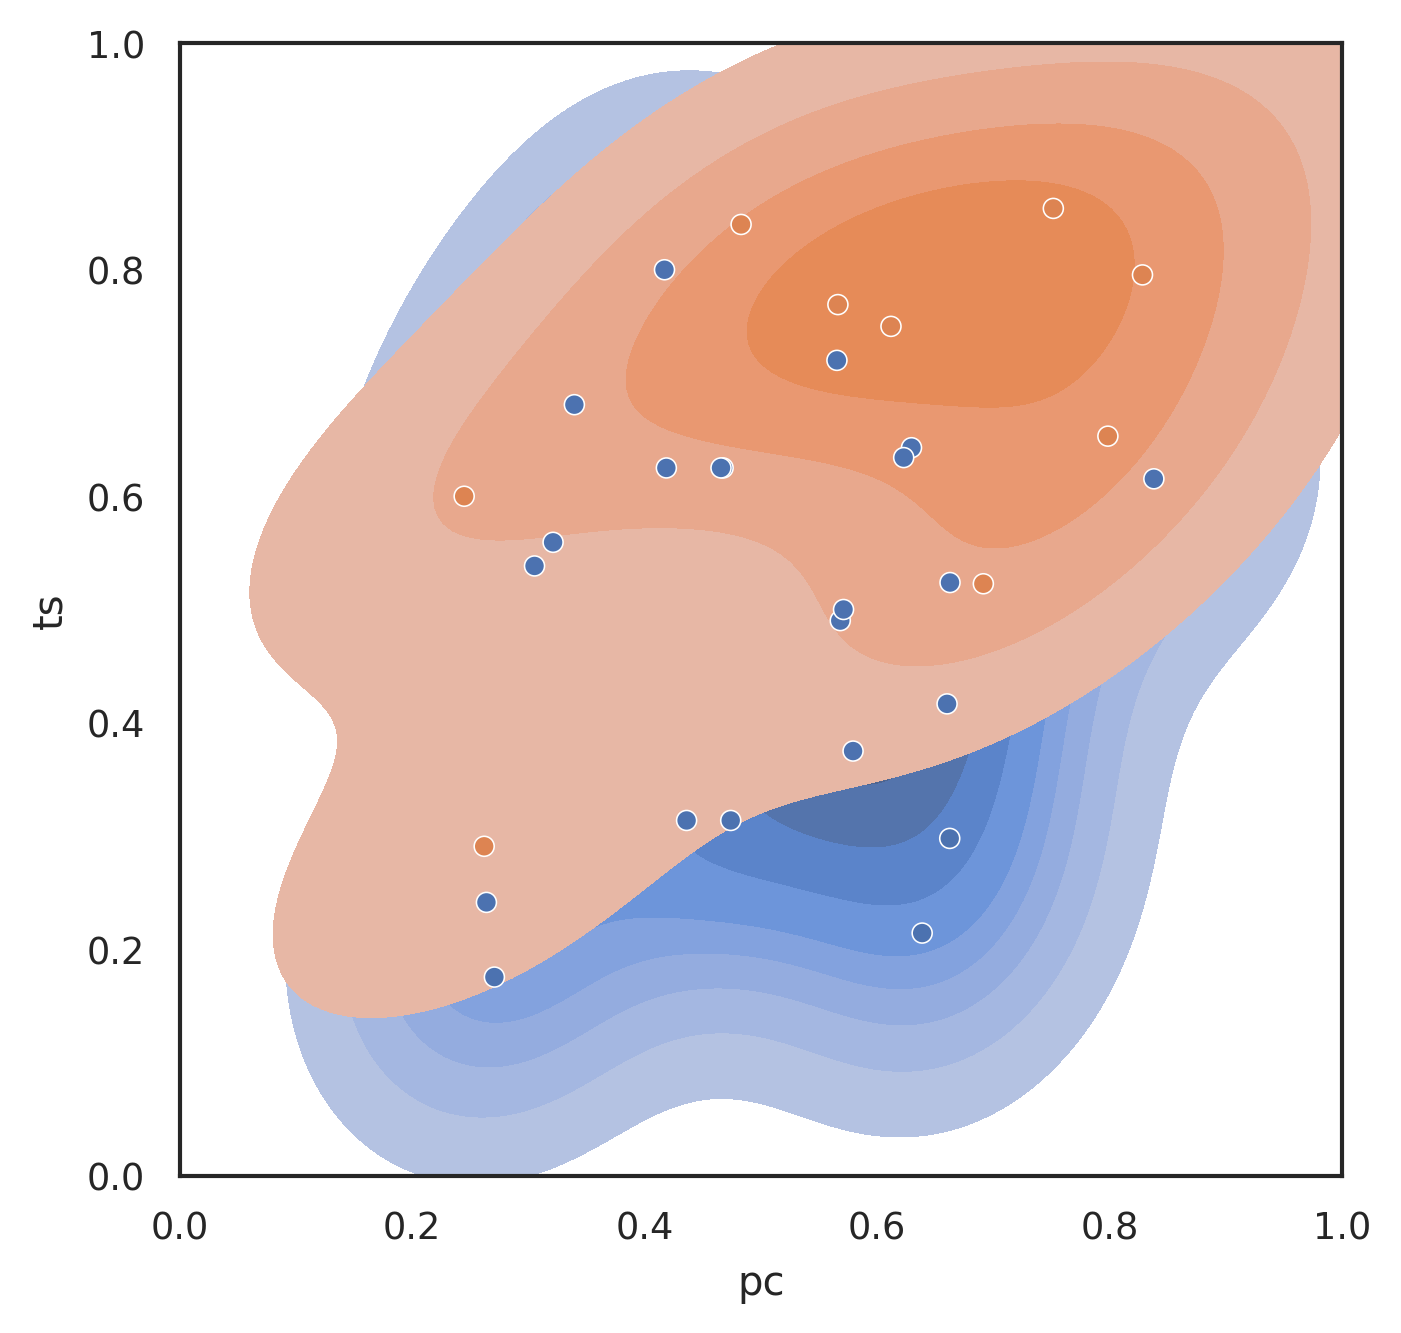

Heirarchial_correct


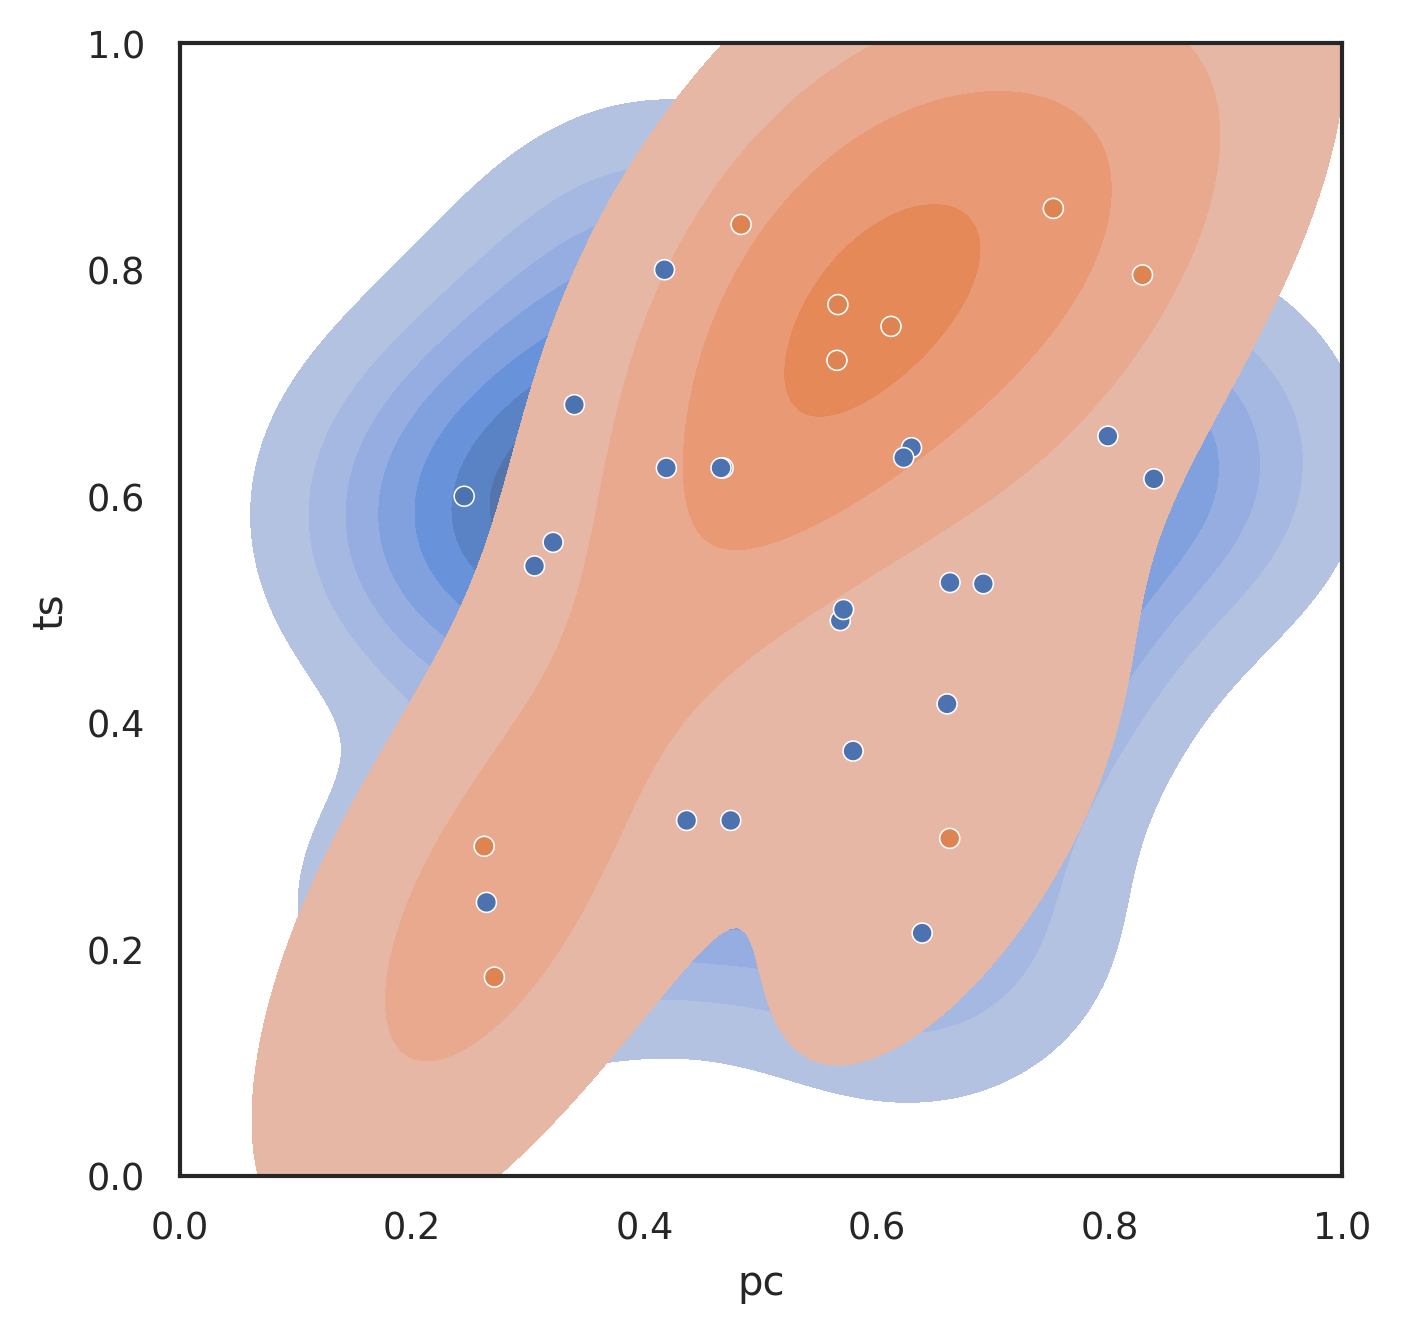

merger_Correct


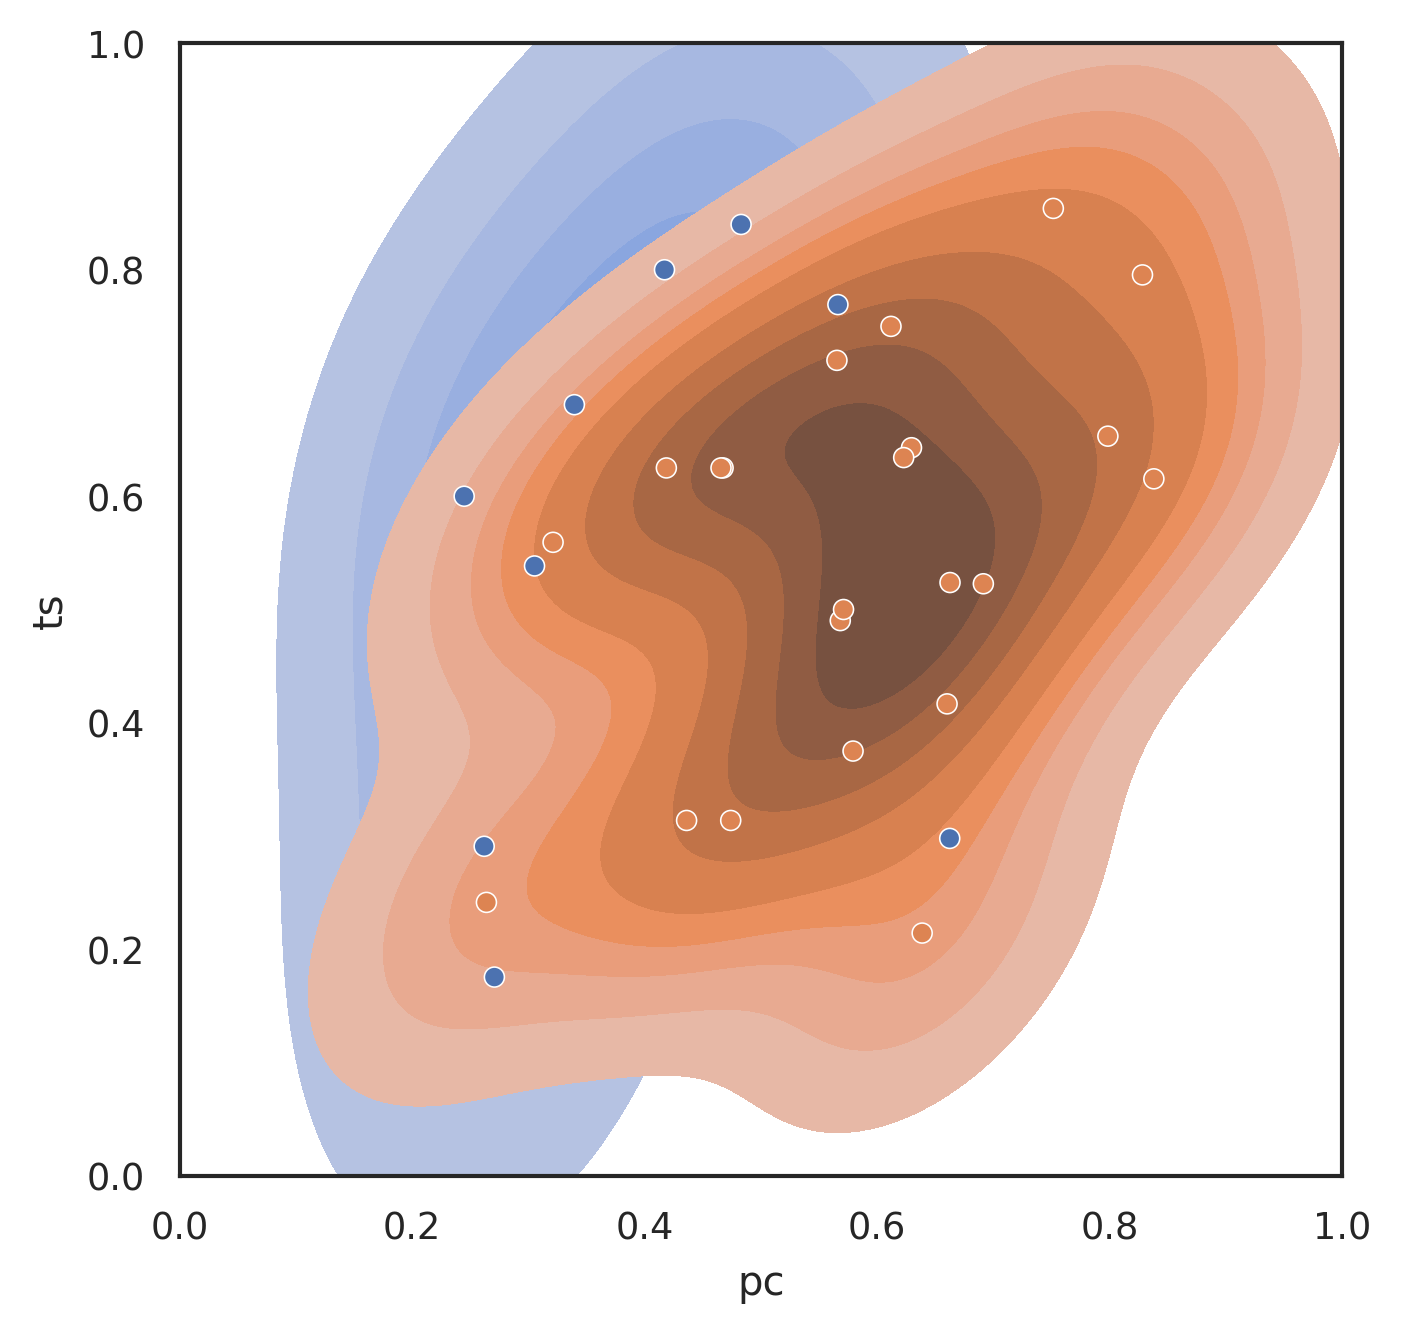

In [123]:
for assay in ["2685"]:#, "624287", "449750"]:
    
    df =results[results["assay"]==assay].reset_index(drop=True)
    
    print(assay)
    
    sns.set(rc={'figure.figsize':(5, 5)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")
    sns.set_context("paper")
    
    
    print("MFP_Correct")
    sns.kdeplot(data=df, x="pc", y="ts", hue="MFP_Correct", legend=False,  fill=True)
    sns.scatterplot(data=df, x="pc", y="ts", hue="MFP_Correct", legend=False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
    print("CP_Correct")
    sns.kdeplot(data=df, x="pc", y="ts", hue="CP_Correct", legend=False,  fill=True)
    sns.scatterplot(data=df, x="pc", y="ts", hue="CP_Correct", legend=False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
    print("Ensemble_Correct")
    sns.kdeplot(data=df, x="pc", y="ts", hue="Ensemble_Correct", legend=False,  fill=True)
    sns.scatterplot(data=df, x="pc", y="ts", hue="Ensemble_Correct", legend=False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
    print("Heirarchial_correct")
    sns.kdeplot(data=df, x="pc", y="ts", hue="heirarchial_Correct", legend=False,  fill=True)
    sns.scatterplot(data=df, x="pc", y="ts", hue="heirarchial_Correct", legend=False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    
    print("merger_Correct")
    sns.kdeplot(data=df, x="pc", y="ts", hue="merger_Correct", legend=False, hue_order=[False, True],  fill=True)
    sns.scatterplot(data=df, x="pc", y="ts", hue="merger_Correct", legend=False)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    

In [6]:
for assay in ["2685"]:
    
    print(assay)

    df =results[results["assay"]==assay].reset_index(drop=True) 
    df

2685


In [7]:
df

,assay,StdInChI,fp_proba,fp_pred,fp_threshold,CP_proba,CP_pred,CP_threshold,true,ts,...,MFP_Correct,CP_Correct,fp_proba_scaled,CP_proba_scaled,simple_pred,Ensemble_Correct,merger_pred,merger_Correct,heirarchial_pred,heirarchial_Correct
0,2685,InChI=1S/C29H33N3O6S2/c1-21-5-10-26(11-6-21)39...,0.109020,0,0.226649,0.195814,0,0.258914,0.0,0.795455,...,True,True,0.240505,0.378145,0.0,True,0.0,True,0.0,True
1,2685,InChI=1S/C31H47N3O7S/c1-22-19-34(23(2)21-35)31...,0.240105,1,0.226649,0.441855,1,0.258914,0.0,0.800000,...,False,False,0.508700,0.623428,1.0,False,1.0,False,1.0,False
2,2685,"InChI=1S/C36H40N4O4S/c1-36(2,3)45(44)40-23-29-...",0.245186,1,0.226649,0.236183,0,0.258914,0.0,0.600000,...,False,True,0.511985,0.456103,0.0,True,1.0,False,1.0,False
3,2685,InChI=1S/C28H29FN2O7S/c1-36-19-6-4-7-21(12-19)...,0.328760,1,0.226649,0.207978,0,0.258914,0.0,0.522727,...,False,True,0.566019,0.401636,0.0,True,0.0,True,1.0,False
4,2685,InChI=1S/C17H18N2O3/c1-12-6-8-13(9-7-12)17(21)...,0.402716,1,0.226649,0.308141,1,0.258914,0.0,0.313725,...,False,False,0.613834,0.533213,1.0,False,0.0,True,1.0,False
5,2685,InChI=1S/C28H29FN2O6S/c1-17(18-5-3-2-4-6-18)30...,0.207381,0,0.226649,0.368803,1,0.258914,0.0,0.642857,...,True,False,0.457493,0.574140,1.0,False,0.0,True,1.0,False
6,2685,InChI=1S/C16H14N4O2/c1-11-5-7-12(8-6-11)15-10-...,0.220612,0,0.226649,0.264501,1,0.258914,1.0,0.175439,...,False,True,0.486683,0.503769,0.0,False,0.0,False,1.0,True
7,2685,InChI=1S/C29H32FN3O3/c1-3-14-32-26-23(24(17-34...,0.243754,1,0.226649,0.381872,1,0.258914,0.0,0.416667,...,False,False,0.511059,0.582958,1.0,False,0.0,True,1.0,False
8,2685,InChI=1S/C33H31FN2O7S/c34-22-8-13-27(14-9-22)4...,0.264684,1,0.226649,0.305060,1,0.258914,0.0,0.634146,...,False,False,0.524591,0.531134,1.0,False,0.0,True,1.0,False
9,2685,InChI=1S/C31H33N3O6/c1-38-23-9-6-21(7-10-23)32...,0.369464,1,0.226649,0.295315,1,0.258914,0.0,0.490196,...,False,False,0.592335,0.524559,1.0,False,0.0,True,1.0,False


In [34]:
len(bins)


21

In [62]:
bin_axis= []
#for i in range(len(bins)-1):
    #print('\"', np.round(bins[i],2), 'to', np.round(bins[i+1],2), '\",', )
bin_axis=[" 0.0 to 0.05 ",
        " 0.05 to 0.1 ",
        " 0.1 to 0.15 ",
        " 0.15 to 0.2 ",
        " 0.2 to 0.25 ",
        " 0.25 to 0.3 ",
        " 0.3 to 0.35 ",
        " 0.35 to 0.4 ",
        " 0.4 to 0.45 ",
        " 0.45 to 0.5 ",
        " 0.5 to 0.55 ",
        " 0.55 to 0.6 ",
        " 0.6 to 0.65 ",
        " 0.65 to 0.7 ",
        " 0.7 to 0.75 ",
        " 0.75 to 0.8 ",
        " 0.8 to 0.85 ",
        " 0.85 to 0.9 ",
        " 0.9 to 0.95 ",
        " 0.95 to 1.0 "]
#bin_axis

True Predictions 5946
False Predictions 4182


/tmp/ipykernel_127078/3735768782.py:18: RuntimeWarning: invalid value encountered in true_divide
  prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
/tmp/ipykernel_127078/3735768782.py:19: RuntimeWarning: invalid value encountered in true_divide
  prop2 = np.nan_to_num(100*hist2/(hist1+hist2))


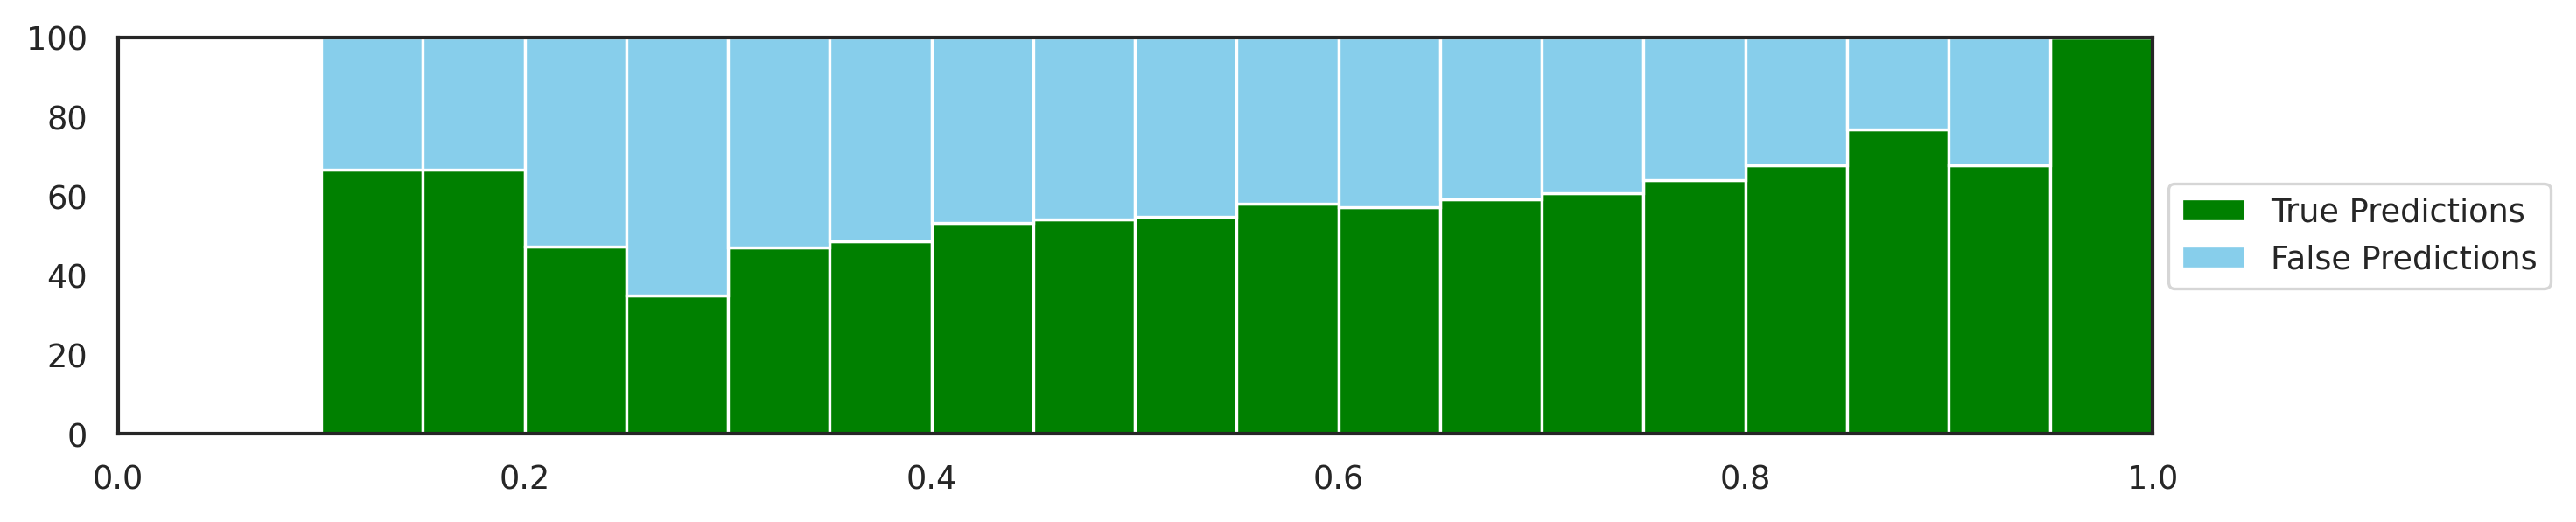

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bin,0.0 to 0.05,0.05 to 0.1,0.1 to 0.15,0.15 to 0.2,0.2 to 0.25,0.25 to 0.3,0.3 to 0.35,0.35 to 0.4,0.4 to 0.45,0.45 to 0.5,0.5 to 0.55,0.55 to 0.6,0.6 to 0.65,0.65 to 0.7,0.7 to 0.75,0.75 to 0.8,0.8 to 0.85,0.85 to 0.9,0.9 to 0.95,0.95 to 1.0
True Predictions,0,0,2,2,9,21,49,95,235,385,528,751,858,968,895,687,350,90,19,2
False Predictions,0,0,1,1,10,39,55,100,206,325,436,541,643,663,575,385,166,27,9,0


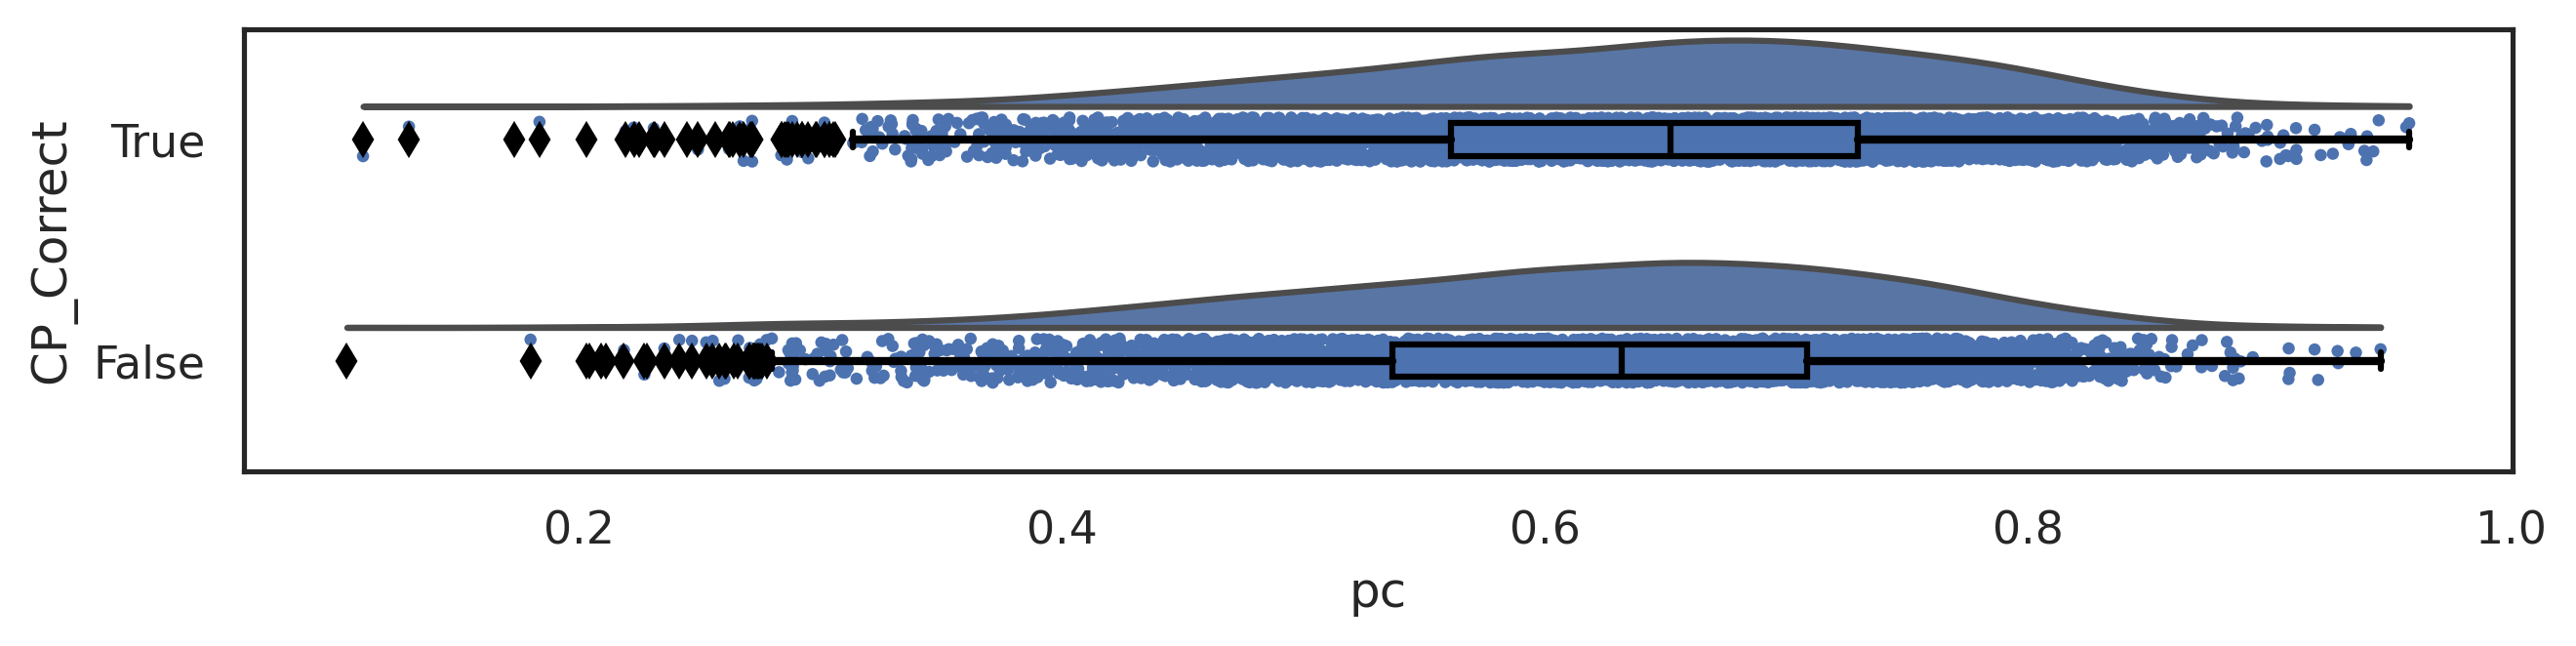

In [64]:
    #cp pc
    df = results
    #[results["assay"]==assay].reset_index(drop=True) 
    data1=df[df["CP_Correct"]==True]["pc"].values
    print("True Predictions", len(data1))
    data2=df[df["CP_Correct"]==False]["pc"].values
    print("False Predictions", len(data2))

    sns.set(rc={'figure.figsize':(10,2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")
    sns.set_context("paper")

    bins, step = np.linspace(0,1,21, retstep=True)
    hist1,_ = np.histogram(data1, bins=bins)
    hist2,_ = np.histogram(data2, bins=bins)

    prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
    prop2 = np.nan_to_num(100*hist2/(hist1+hist2))

    fig, ax = plt.subplots()
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=100)
    ax.bar(x=bins[:-1], height=prop1, bottom=0, align='edge', width=step, color="Green")
    ax.bar(x=bins[:-1], height=prop2, bottom=prop1, align='edge', width=step,color="Skyblue")
    

    Gender=['True Predictions','False Predictions']
    ax.legend(Gender, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    #Numbers
    k = pd.DataFrame()
    k["bin"] = bin_axis
    k['True Predictions'] = hist1 
    k['False Predictions'] = hist2
    display(k.T)
    
     
    #Distribution
    import ptitprince as pt
    sns.set(rc={'figure.figsize':(10, 2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")

    pal = "Set2"
    ort="h"
    pal = sns.color_palette(n_colors=1)
    ax.set_xlim(left=0, right=1)
    pt.half_violinplot( x = "pc", y = "CP_Correct",order=[True,  False], data = df, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "pc", y = "CP_Correct", order=[True,  False],data = df,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "pc", y = "CP_Correct",order=[True,  False], data = df, color = "black", width = .15, zorder = 10,showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()
    

True Predictions 5808
False Predictions 4320


/tmp/ipykernel_127078/4240466592.py:18: RuntimeWarning: invalid value encountered in true_divide
  prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
/tmp/ipykernel_127078/4240466592.py:19: RuntimeWarning: invalid value encountered in true_divide
  prop2 = np.nan_to_num(100*hist2/(hist1+hist2))


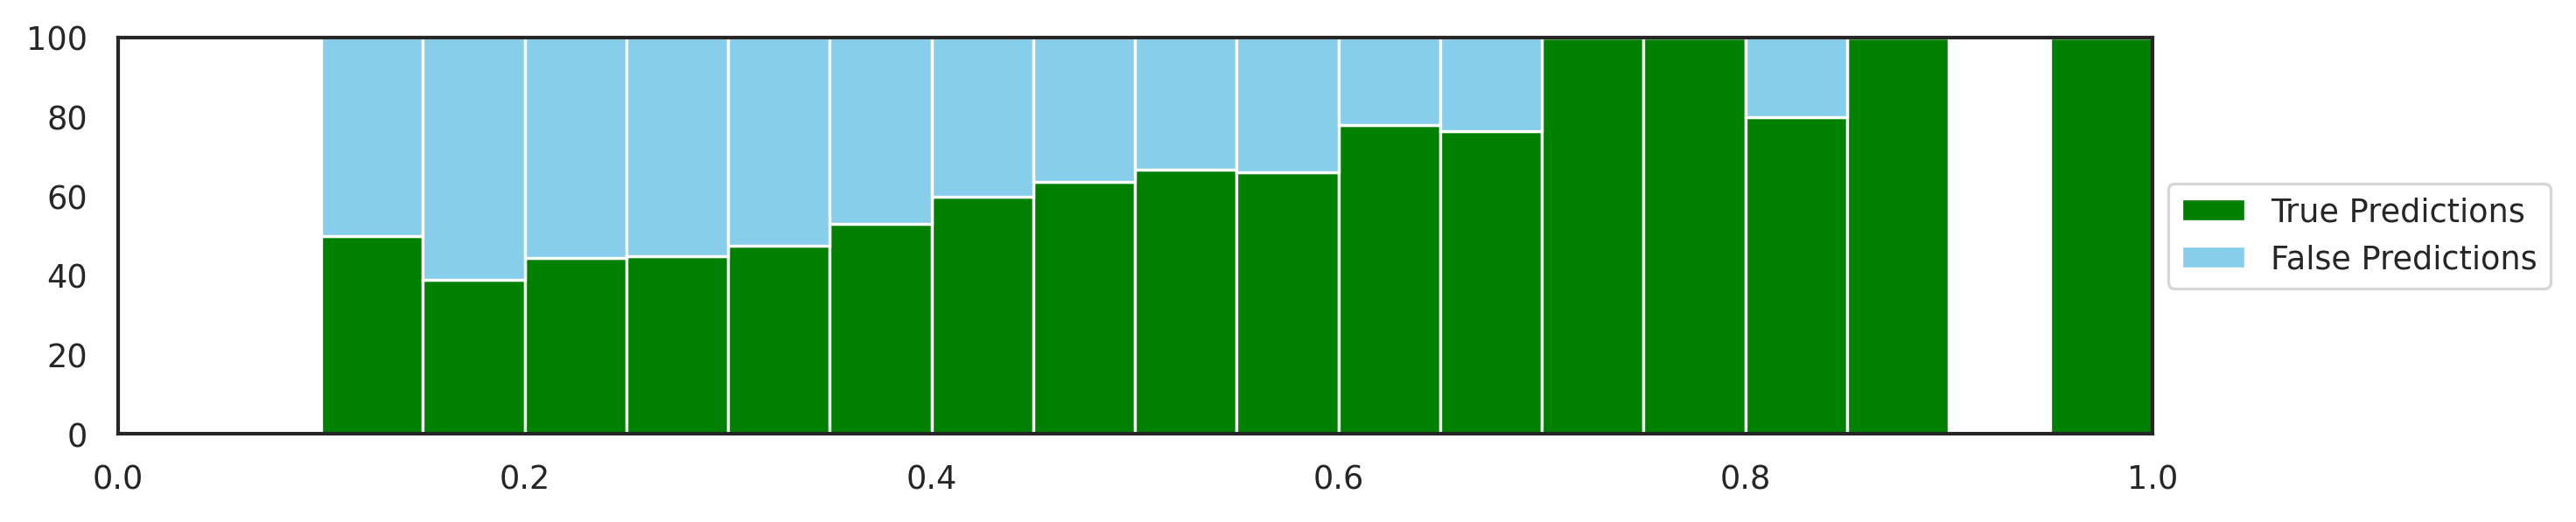

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bin,0.0 to 0.05,0.05 to 0.1,0.1 to 0.15,0.15 to 0.2,0.2 to 0.25,0.25 to 0.3,0.3 to 0.35,0.35 to 0.4,0.4 to 0.45,0.45 to 0.5,0.5 to 0.55,0.55 to 0.6,0.6 to 0.65,0.65 to 0.7,0.7 to 0.75,0.75 to 0.8,0.8 to 0.85,0.85 to 0.9,0.9 to 0.95,0.95 to 1.0
True Predictions,0,0,1,7,52,240,643,1229,1752,1005,610,158,53,26,14,10,4,3,0,1
False Predictions,0,0,1,11,65,294,711,1090,1168,572,303,81,15,8,0,0,1,0,0,0


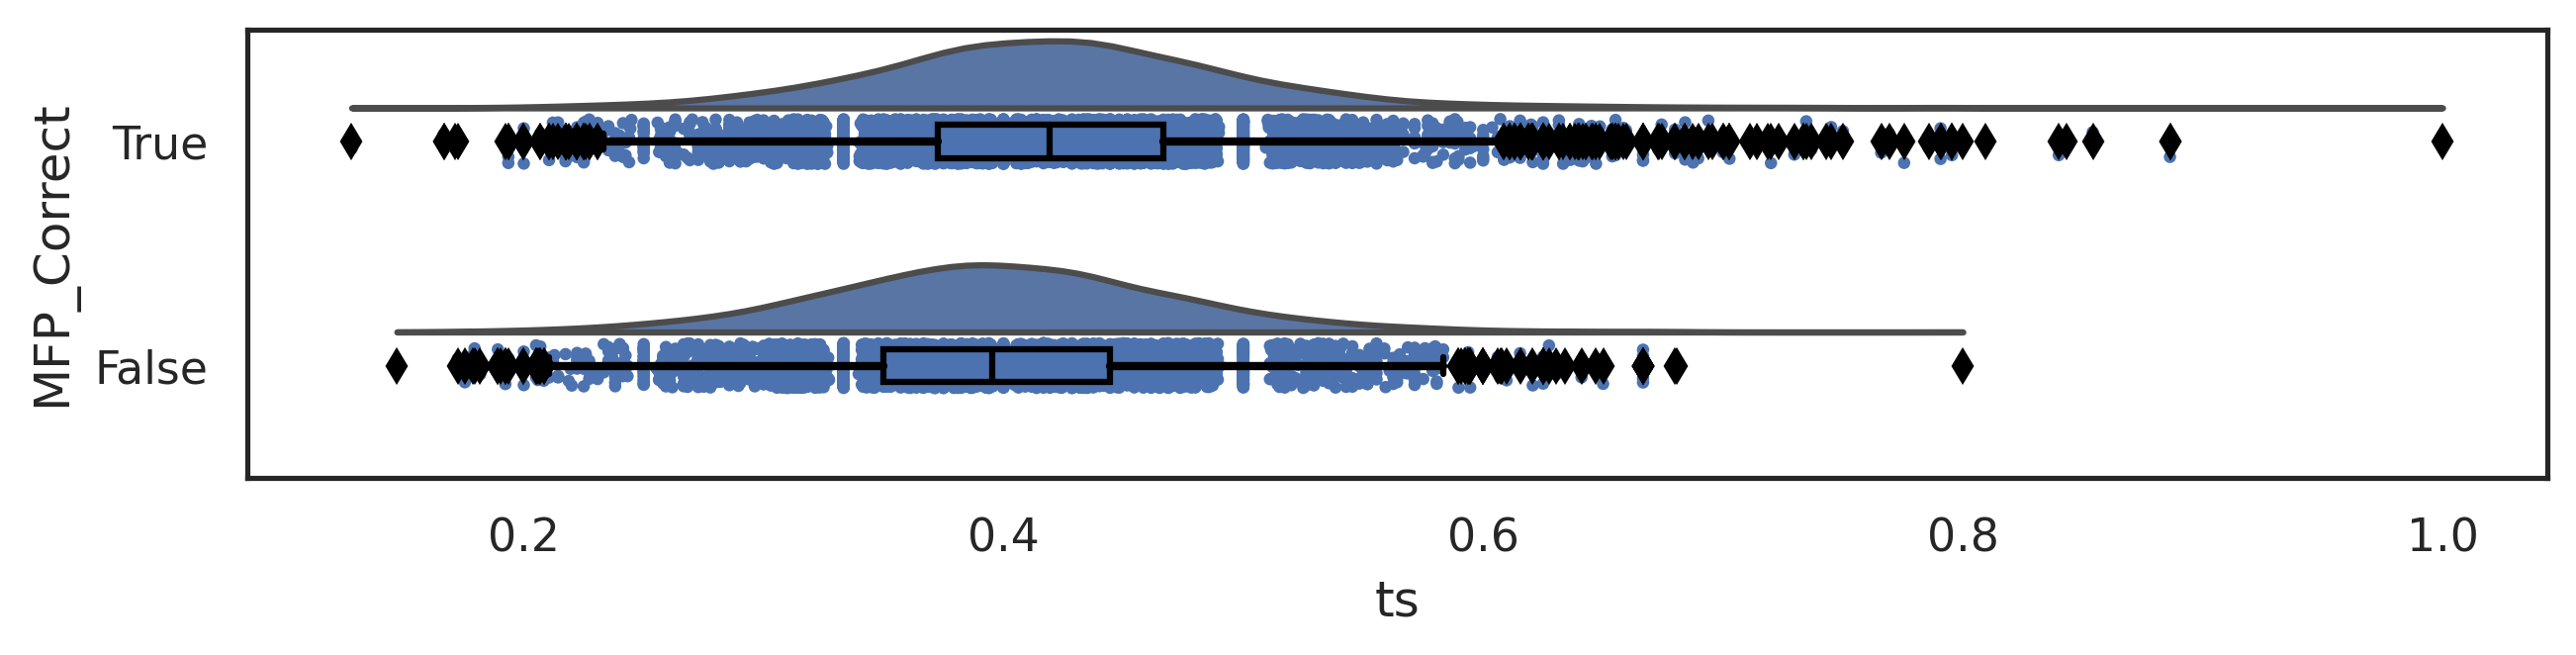

In [66]:
    #mfp ts
    df = results
    #[results["assay"]==assay].reset_index(drop=True) 
    data1=df[df["MFP_Correct"]==True]["ts"].values
    print("True Predictions", len(data1))
    data2=df[df["MFP_Correct"]==False]["ts"].values
    print("False Predictions", len(data2))

    sns.set(rc={'figure.figsize':(10,2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")
    sns.set_context("paper")

    bins, step = np.linspace(0,1,21, retstep=True)
    hist1,_ = np.histogram(data1, bins=bins)
    hist2,_ = np.histogram(data2, bins=bins)

    prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
    prop2 = np.nan_to_num(100*hist2/(hist1+hist2))

    fig, ax = plt.subplots()
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=100)
    ax.bar(x=bins[:-1], height=prop1, bottom=0, align='edge', width=step, color="Green")
    ax.bar(x=bins[:-1], height=prop2, bottom=prop1, align='edge', width=step,color="Skyblue")
    

    Gender=['True Predictions','False Predictions']
    ax.legend(Gender, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    #Numbers
    k = pd.DataFrame()
    k["bin"] = bin_axis
    k['True Predictions'] = hist1 
    k['False Predictions'] = hist2
    display(k.T)
    
     
    #Distribution
    import ptitprince as pt
    sns.set(rc={'figure.figsize':(10, 2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")

    pal = "Set2"
    ort="h"
    pal = sns.color_palette(n_colors=1)
    ax.set_xlim(left=0, right=1)
    pt.half_violinplot( x = "ts", y = "MFP_Correct",order=[True,  False], data = df, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "ts", y = "MFP_Correct", order=[True,  False],data = df,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "ts", y = "MFP_Correct",order=[True,  False], data = df, color = "black", width = .15, zorder = 10,
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()
    

True Predictions 6764
False Predictions 3364


/tmp/ipykernel_127078/3358730481.py:18: RuntimeWarning: invalid value encountered in true_divide
  prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
/tmp/ipykernel_127078/3358730481.py:19: RuntimeWarning: invalid value encountered in true_divide
  prop2 = np.nan_to_num(100*hist2/(hist1+hist2))


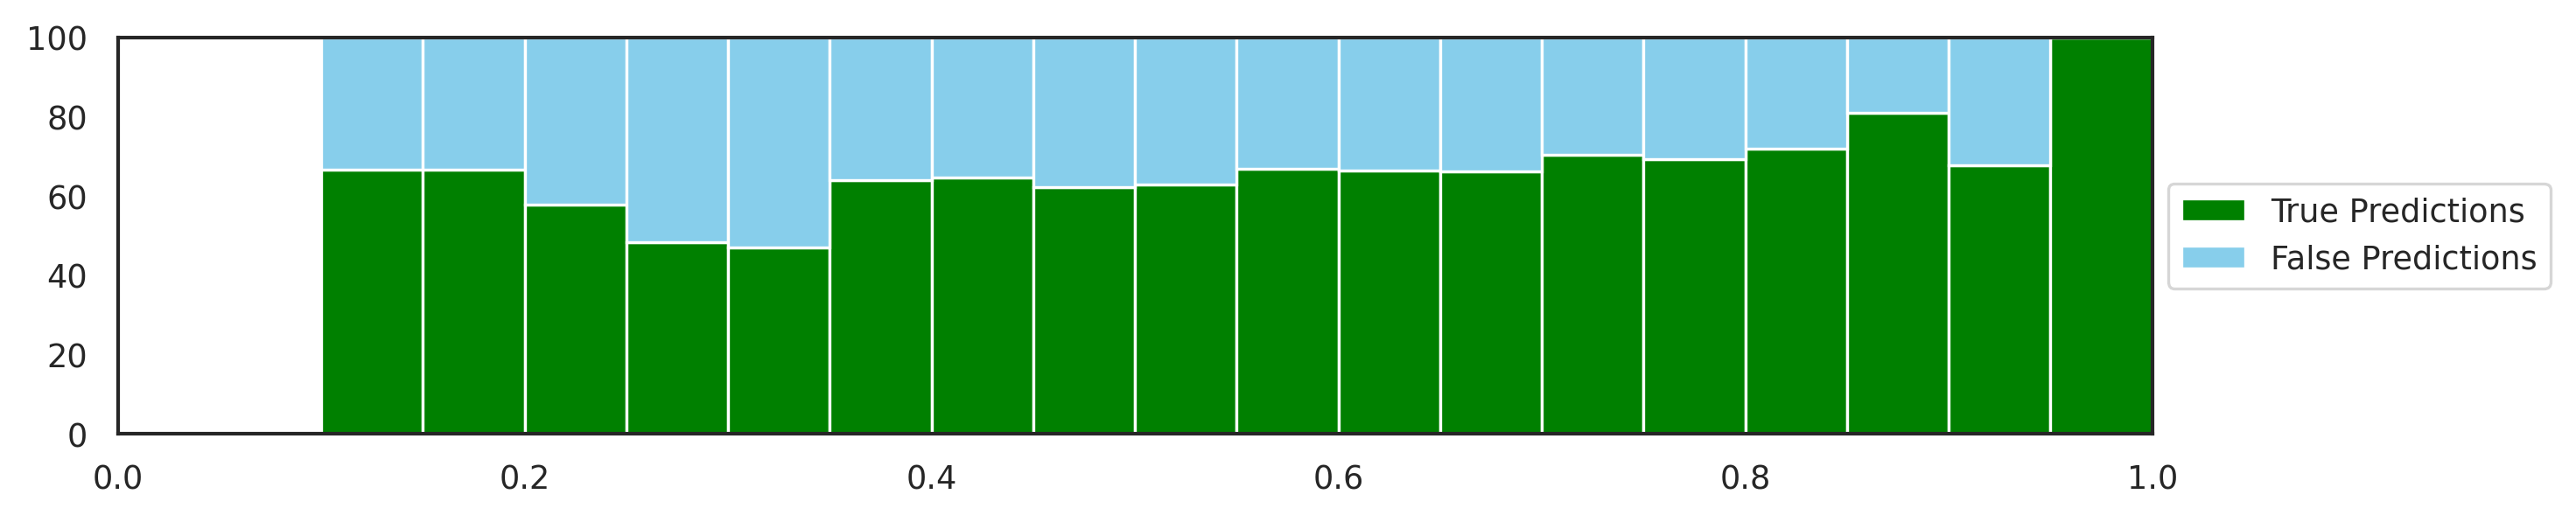

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bin,0.0 to 0.05,0.05 to 0.1,0.1 to 0.15,0.15 to 0.2,0.2 to 0.25,0.25 to 0.3,0.3 to 0.35,0.35 to 0.4,0.4 to 0.45,0.45 to 0.5,0.5 to 0.55,0.55 to 0.6,0.6 to 0.65,0.65 to 0.7,0.7 to 0.75,0.75 to 0.8,0.8 to 0.85,0.85 to 0.9,0.9 to 0.95,0.95 to 1.0
True Predictions,0,0,2,2,11,29,49,125,286,442,607,864,998,1081,1036,744,372,95,19,2
False Predictions,0,0,1,1,8,31,55,70,155,268,357,428,503,550,434,328,144,22,9,0


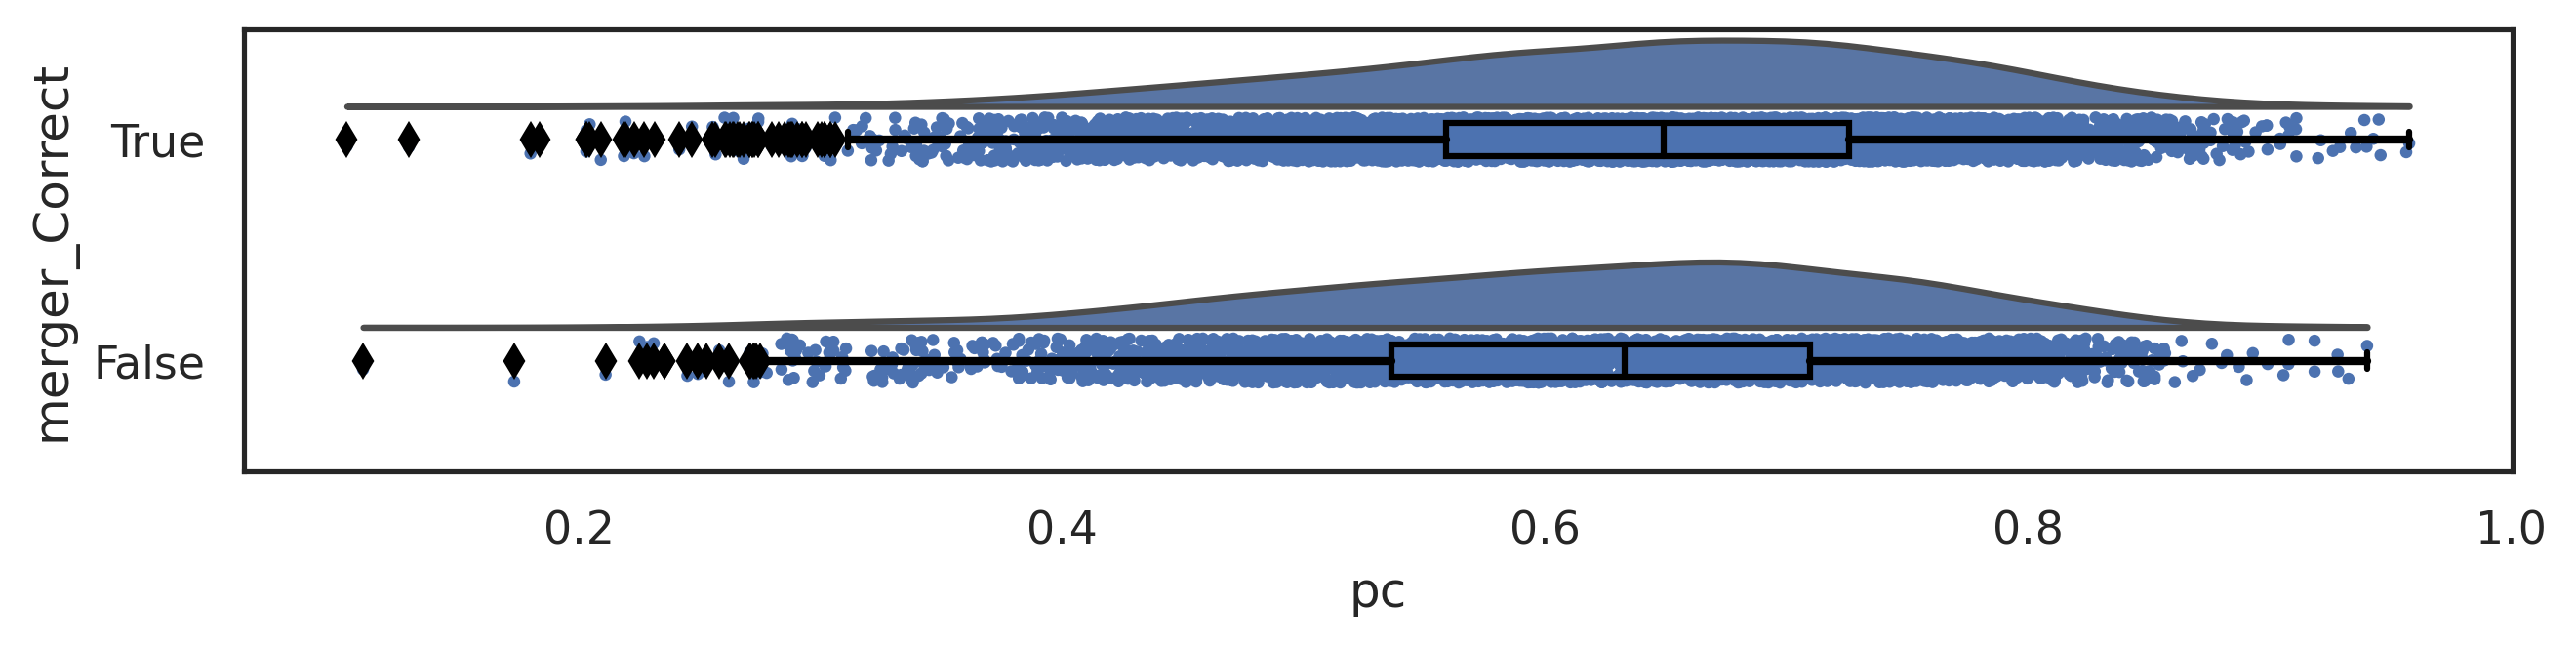

In [69]:
    #merger_Correct pc
    df = results
    #[results["assay"]==assay].reset_index(drop=True) 
    data1=df[df["merger_Correct"]==True]["pc"].values
    print("True Predictions", len(data1))
    data2=df[df["merger_Correct"]==False]["pc"].values
    print("False Predictions", len(data2))

    sns.set(rc={'figure.figsize':(10,2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")
    sns.set_context("paper")

    bins, step = np.linspace(0,1,21, retstep=True)
    hist1,_ = np.histogram(data1, bins=bins)
    hist2,_ = np.histogram(data2, bins=bins)

    prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
    prop2 = np.nan_to_num(100*hist2/(hist1+hist2))

    fig, ax = plt.subplots()
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=100)
    ax.bar(x=bins[:-1], height=prop1, bottom=0, align='edge', width=step, color="Green")
    ax.bar(x=bins[:-1], height=prop2, bottom=prop1, align='edge', width=step,color="Skyblue")
    

    Gender=['True Predictions','False Predictions']
    ax.legend(Gender, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    #Numbers
    k = pd.DataFrame()
    k["bin"] = bin_axis
    k['True Predictions'] = hist1 
    k['False Predictions'] = hist2
    display(k.T)
    
     
    #Distribution
    import ptitprince as pt
    sns.set(rc={'figure.figsize':(10, 2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")

    pal = "Set2"
    ort="h"
    pal = sns.color_palette(n_colors=1)
    ax.set_xlim(left=0, right=1)
    pt.half_violinplot( x = "pc", y = "merger_Correct",order=[True,  False], data = df, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "pc", y = "merger_Correct", order=[True,  False],data = df,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "pc", y = "merger_Correct",order=[True,  False], data = df, color = "black", width = .15, zorder = 10,
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()
    

True Predictions 6764
False Predictions 3364


/tmp/ipykernel_127078/1890100383.py:18: RuntimeWarning: invalid value encountered in true_divide
  prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
/tmp/ipykernel_127078/1890100383.py:19: RuntimeWarning: invalid value encountered in true_divide
  prop2 = np.nan_to_num(100*hist2/(hist1+hist2))


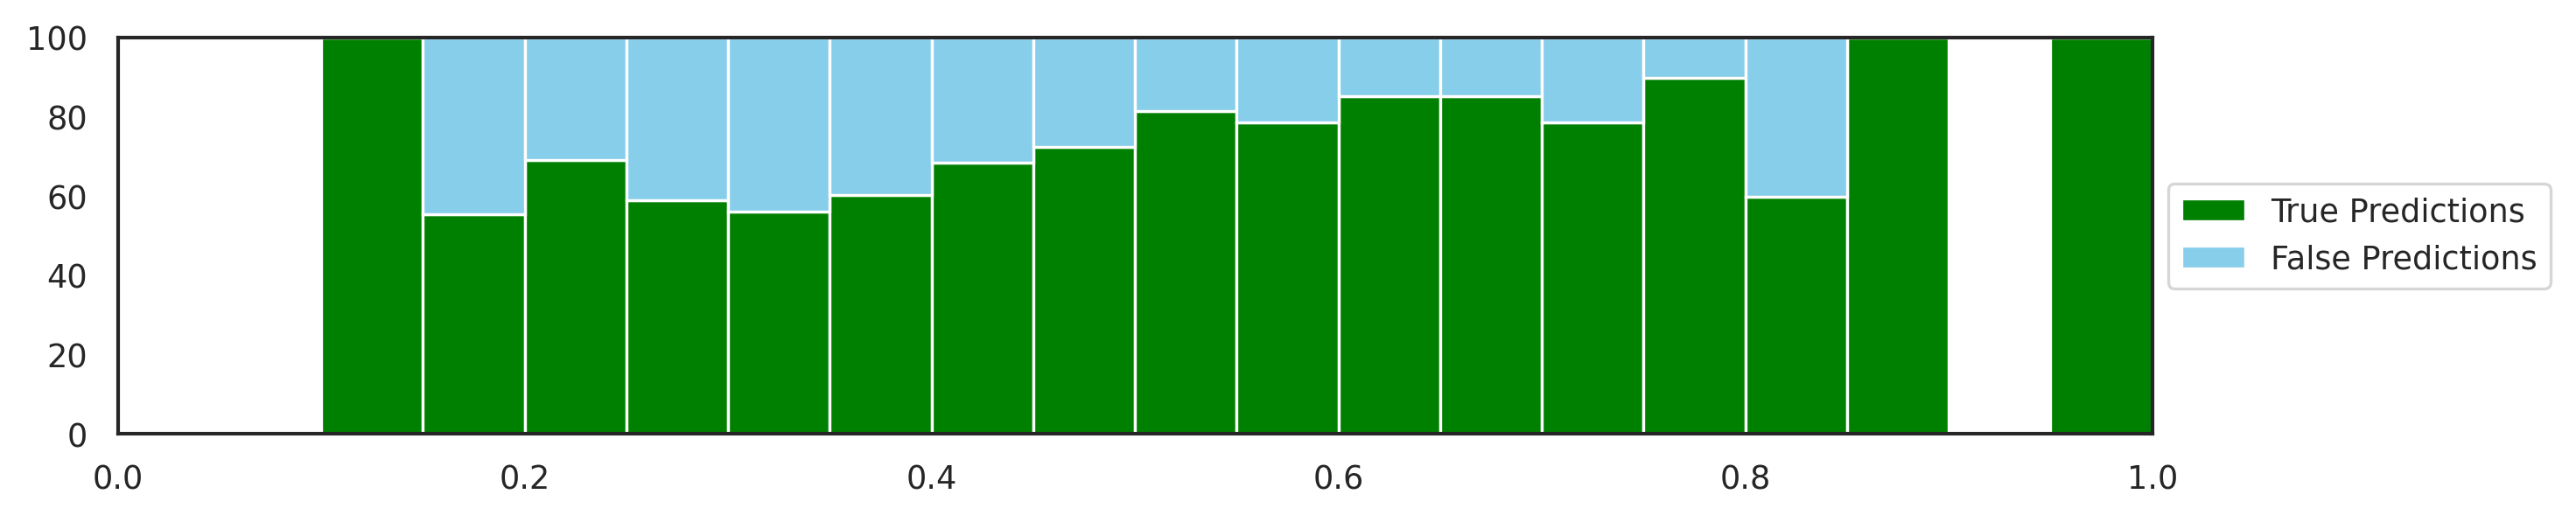

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
bin,0.0 to 0.05,0.05 to 0.1,0.1 to 0.15,0.15 to 0.2,0.2 to 0.25,0.25 to 0.3,0.3 to 0.35,0.35 to 0.4,0.4 to 0.45,0.45 to 0.5,0.5 to 0.55,0.55 to 0.6,0.6 to 0.65,0.65 to 0.7,0.7 to 0.75,0.75 to 0.8,0.8 to 0.85,0.85 to 0.9,0.9 to 0.95,0.95 to 1.0
True Predictions,0,0,2,10,81,315,761,1402,2003,1143,745,188,58,29,11,9,3,3,0,1
False Predictions,0,0,0,8,36,219,593,917,917,434,168,51,10,5,3,1,2,0,0,0


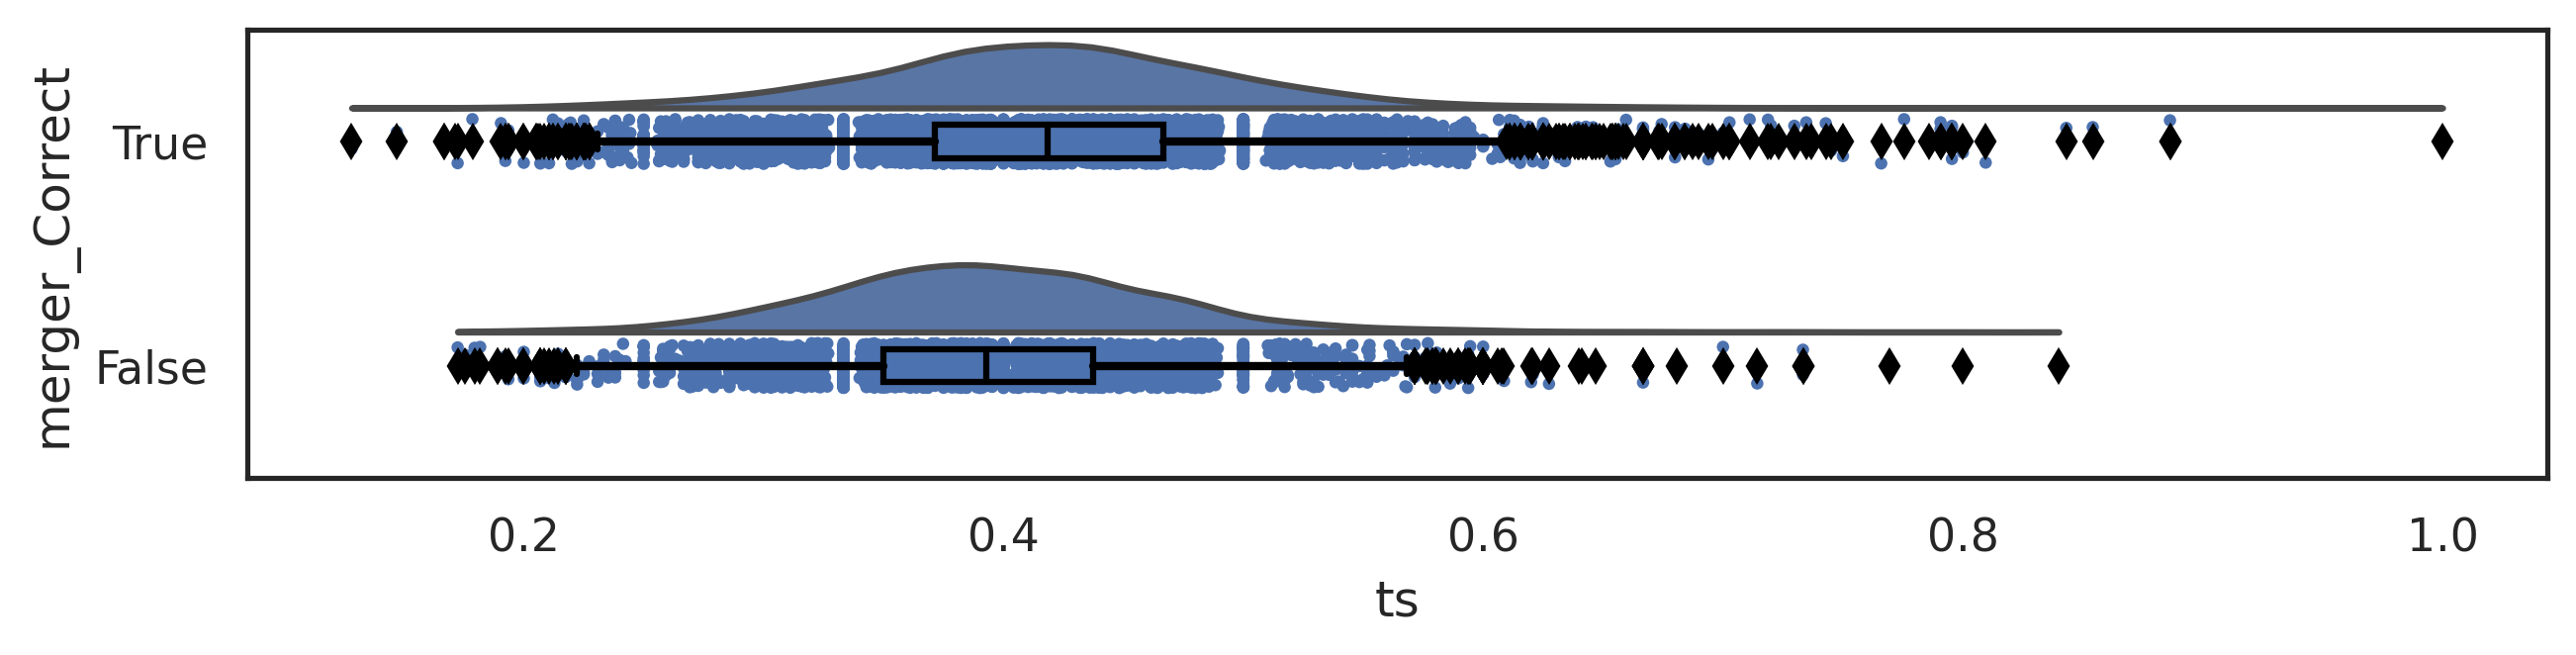

In [70]:
    #merger_Correct ts
    df = results
    #[results["assay"]==assay].reset_index(drop=True) 
    data1=df[df["merger_Correct"]==True]["ts"].values
    print("True Predictions", len(data1))
    data2=df[df["merger_Correct"]==False]["ts"].values
    print("False Predictions", len(data2))

    sns.set(rc={'figure.figsize':(10,2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")
    sns.set_context("paper")

    bins, step = np.linspace(0,1,21, retstep=True)
    hist1,_ = np.histogram(data1, bins=bins)
    hist2,_ = np.histogram(data2, bins=bins)

    prop1 = np.nan_to_num(100*hist1/(hist1+hist2))
    prop2 = np.nan_to_num(100*hist2/(hist1+hist2))

    fig, ax = plt.subplots()
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=100)
    ax.bar(x=bins[:-1], height=prop1, bottom=0, align='edge', width=step, color="Green")
    ax.bar(x=bins[:-1], height=prop2, bottom=prop1, align='edge', width=step,color="Skyblue")
    

    Gender=['True Predictions','False Predictions']
    ax.legend(Gender, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
    #Numbers
    k = pd.DataFrame()
    k["bin"] = bin_axis
    k['True Predictions'] = hist1 
    k['False Predictions'] = hist2
    display(k.T)
    
     
    #Distribution
    import ptitprince as pt
    sns.set(rc={'figure.figsize':(10, 2)})
    plt.rcParams['figure.dpi'] = 300
    sns.set_style("white")

    pal = "Set2"
    ort="h"
    pal = sns.color_palette(n_colors=1)
    ax.set_xlim(left=0, right=1)
    pt.half_violinplot( x = "ts", y = "merger_Correct",order=[True,  False], data = df, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "ts", y = "merger_Correct", order=[True,  False],data = df,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "ts", y = "merger_Correct",order=[True,  False], data = df, color = "black", width = .15, zorder = 10,
                showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()
    

2685


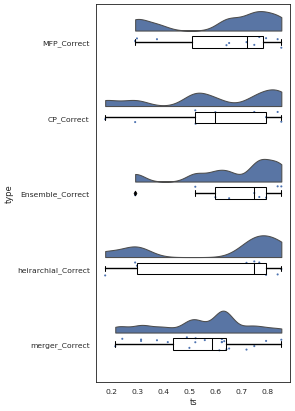

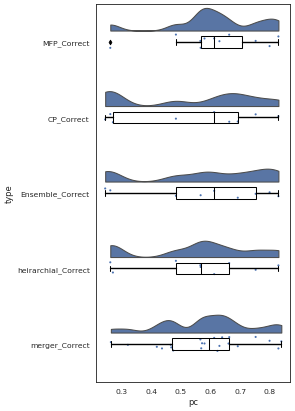

651635


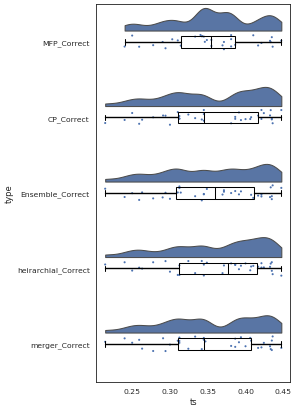

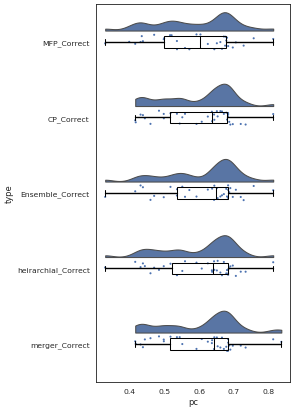

504327


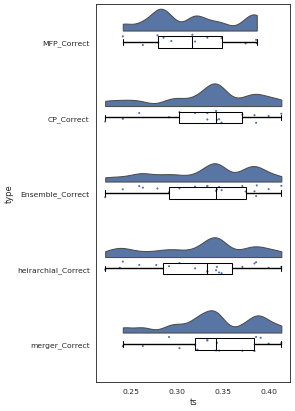

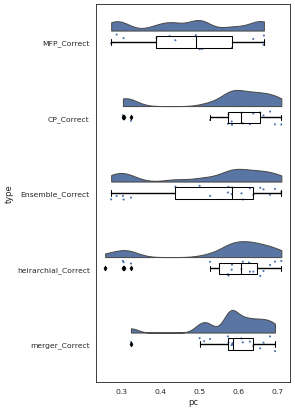

In [45]:
for assay in ["2685", "651635", "504327"]:
    
    print(assay)

    df =results[results["assay"]==assay].reset_index(drop=True)   
    
    alldata=pd.DataFrame()

    data=df[df["MFP_Correct"]==True][["ts","pc"]]
    data["type"] = "MFP_Correct"
    alldata= pd.concat([alldata, data])

    data=df[df["CP_Correct"]==True][["ts","pc"]]
    data["type"] = "CP_Correct"
    alldata= pd.concat([alldata, data])

    data=df[df["Ensemble_Correct"]==True][["ts","pc"]]
    data["type"] = "Ensemble_Correct"
    alldata= pd.concat([alldata, data])

    data=df[df["heirarchial_Correct"]==True][["ts","pc"]]
    data["type"] = "heirarchial_Correct"
    alldata= pd.concat([alldata, data])
    
    data=df[df["merger_Correct"]==True][["ts","pc"]]
    data["type"] = "merger_Correct"
    alldata= pd.concat([alldata, data])


    #adding color
    import ptitprince as pt
    sns.set(rc={'figure.figsize':(5, 10)})
    plt.rcParams['figure.dpi'] = 50
    sns.set_style("white")


    pal = "Set2"
    ort="h"
    pal = sns.color_palette(n_colors=1)


    pt.half_violinplot( x = "ts", y = "type", data = alldata, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "ts", y = "type", data = alldata,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "ts", y = "type", data = alldata, color = "black", width = .15, zorder = 10,showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()


    #adding color
    pt.half_violinplot( x = "pc", y = "type", data = alldata, palette = pal, bw = .2, cut = 0., 
                          scale = "area", width = .6, inner = None, orient = ort)

    sns.stripplot(  x = "pc", y = "type", data = alldata,  palette = pal, edgecolor = "white",
                     size = 3, jitter = 1, zorder = 0, orient = ort)

    sns.boxplot(  x = "pc", y = "type", data = alldata, color = "black", width = .15, zorder = 10,showcaps = True, boxprops = {'facecolor':'none', "zorder":10},
                   showfliers=True, whiskerprops = {'linewidth':2, "zorder":10}, saturation = 1, orient = ort)

    plt.show()



2685


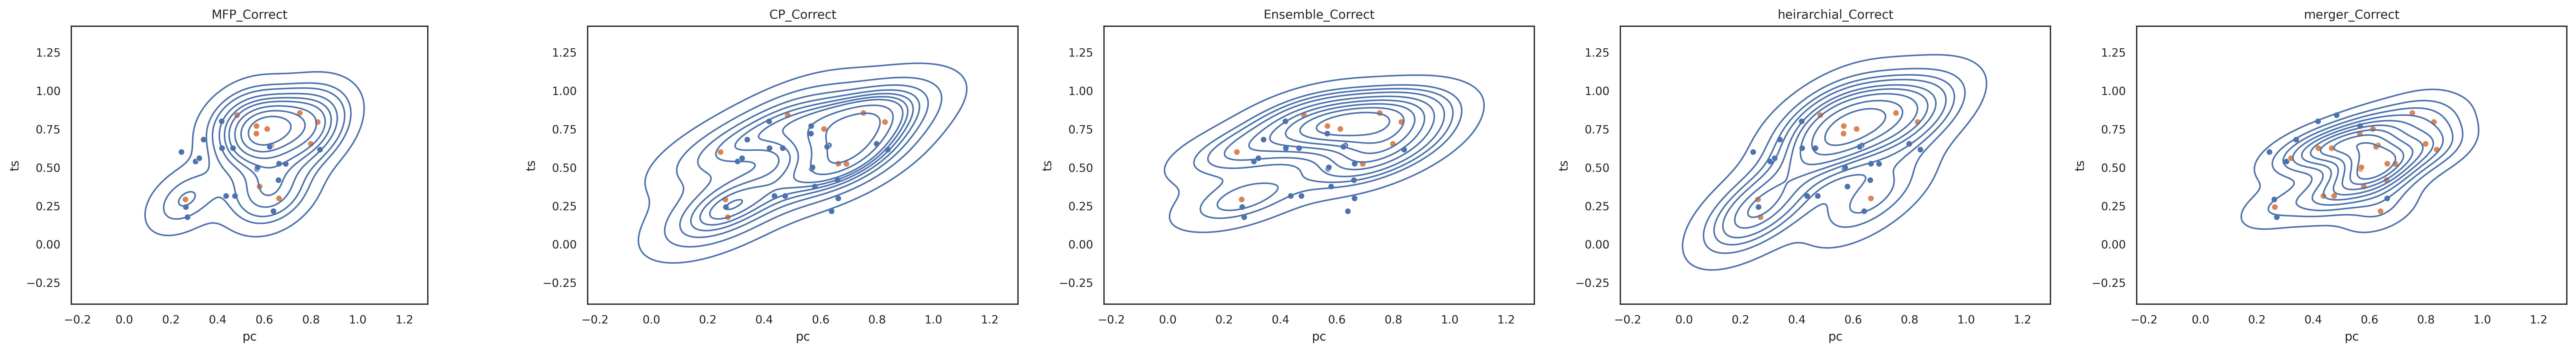

In [87]:
for assay in ["2685"]:#, "624287", "449750"]:
    
    print(assay)
    
    
    sns.set(rc={'figure.figsize':(35, 4)})
    plt.rcParams['figure.dpi'] = 400
    sns.set_style("white")
    sns.set_context("paper")
    
    fig, ax = plt.subplots(1, 6)


    #ax[0].set_xlim(left=0, right=1)
    #ax[0].set_ylim(bottom=0, top=1)

    ax[1]=plt.subplot(1, 5, 2, sharey=ax[0], sharex=ax[0])
    ax[2]=plt.subplot(1, 5, 3, sharey=ax[0], sharex=ax[0])
    ax[3]=plt.subplot(1, 5, 4, sharey=ax[0], sharex=ax[0])
    ax[4]=plt.subplot(1, 5, 5, sharey=ax[0], sharex=ax[0])

    df =results[results["assay"]==assay].reset_index(drop=True)    
    try:
        sns.kdeplot(data=df[df["MFP_Correct"]==True], x="pc", y="ts", hue="MFP_Correct",legend=False, ax=ax[0])
        sns.scatterplot(data=df, x="pc", y="ts", hue="MFP_Correct", legend=False, ax=ax[0])
        ax[0].set(title='MFP_Correct')
    except:
        continue    
        
    try:
        sns.kdeplot(data=df[df["CP_Correct"]==True], x="pc", y="ts", hue="CP_Correct", legend=False, ax=ax[1])
        sns.scatterplot(data=df, x="pc", y="ts", hue="CP_Correct", legend=False, ax=ax[1])
        ax[1].set(title='CP_Correct')
    except:
        continue    
        
    try:
        sns.kdeplot(data=df[df["Ensemble_Correct"]==True], x="pc", y="ts", hue="Ensemble_Correct", legend=False, ax=ax[2])
        sns.scatterplot(data=df, x="pc", y="ts", hue="Ensemble_Correct", legend=False, ax=ax[2])
        ax[2].set(title='Ensemble_Correct')
    except:
        continue    
        
    try:
        sns.kdeplot(data=df[df["heirarchial_Correct"]==True], x="pc", y="ts", hue="heirarchial_Correct", legend=False, ax=ax[3])
        sns.scatterplot(data=df, x="pc", y="ts", hue="heirarchial_Correct", legend=False, ax=ax[3])
        ax[3].set(title='heirarchial_Correct')    
    except:
        continue
        
    try:
        sns.kdeplot(data=df[df["merger_Correct"]==True], x="pc", y="ts", hue="merger_Correct", legend=False, ax=ax[4])
        sns.scatterplot(data=df, x="pc", y="ts", hue="merger_Correct", legend=False, ax=ax[4])
        ax[4].set(title='merger_Correct')    
    except:
        continue

    plt.show()